# Beat-finding using autocorrelations
In this snippet we learn how to do some beat-finding using autocorrelations.

First, let's import the necessary functions and classes:

In [1]:
from thebeat.core import Sequence
from thebeat.stats import acf_df, acf_plot, acf_values
import numpy as np
import scipy.signal

In [2]:
# We suppress warnings, but let's hide that to avoid confusion
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

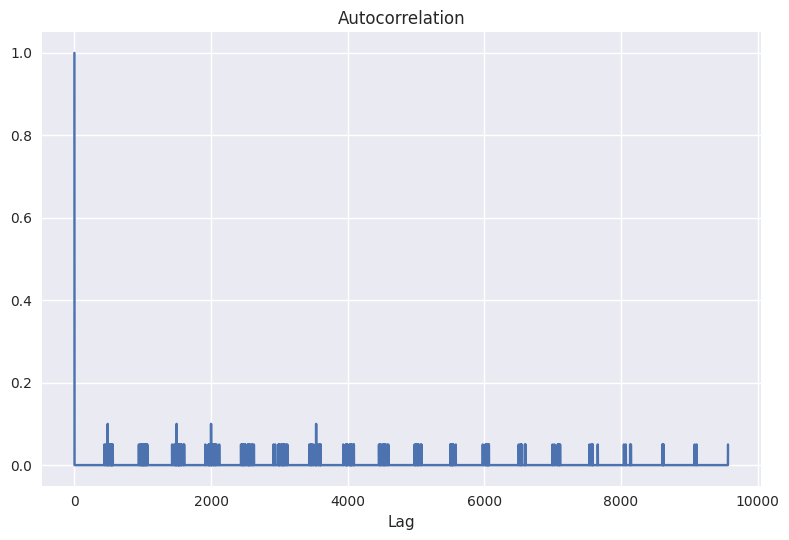

In [3]:
# We use a Generator object with a seed so you will get the same results as we:
rng = np.random.default_rng(seed=123)

seq = Sequence.generate_random_normal(n_events=20, mu=500, sigma=40, rng=rng)
acf_plot(seq, resolution=1);

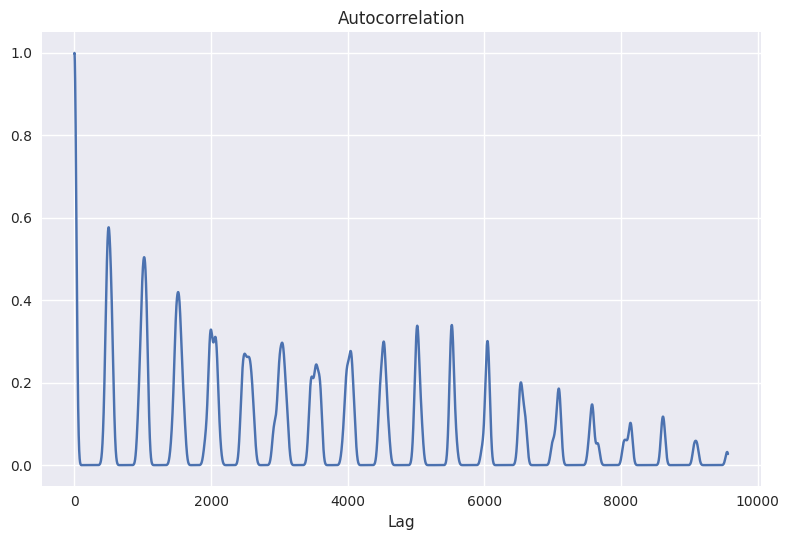

In [4]:
acf_plot(seq, resolution=1, smoothing_window=100, smoothing_sd=20);

In [5]:
# We use a Generator object with a seed so you will get the same results as we:
correlation_factors = acf_values(seq, resolution=1, smoothing_window=100, smoothing_sd=20)

peaks = scipy.signal.find_peaks(correlation_factors)
print(peaks)

(array([   1,  501, 1021, 1518, 1998, 2062, 2492, 2547, 3040, 3475, 3540,
       4042, 4527, 5018, 5523, 6046, 6535, 7089, 7577, 7656, 8061, 8139,
       8615, 9093, 9553]), {})


As such, we can see where the peaks lie.

---

In [6]:
resolution = 10

correlation_factors = acf_values(seq,
                                 resolution=resolution,
                                 smoothing_window=100,
                                 smoothing_sd=20)

peaks = scipy.signal.find_peaks(correlation_factors)
peaks = peaks[0] * resolution
print(peaks)

[ 490 1020 1520 2070 2520 3050 3570 4030 4530]


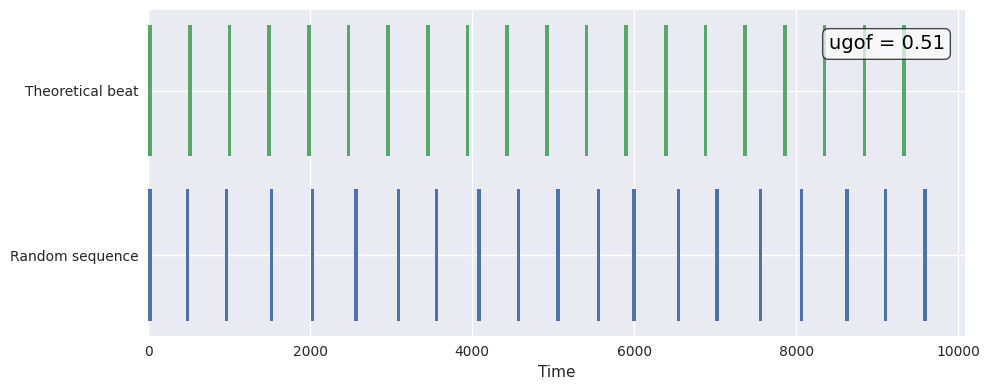

In [7]:
# Plot
from thebeat.visualization import plot_multiple_sequences
from thebeat.stats import get_ugof_isochronous

# Make isochronous sequence
seq_isoc = Sequence.generate_isochronous(n_events=20, ioi=peaks[0])

fig, ax = plot_multiple_sequences([seq_isoc, seq], 
                                  figsize=(10, 4),
                                  y_axis_labels=['Theoretical beat', 'Random sequence'], 
                                  suppress_display=True)


# Add box with ugof
ugof_round = str(round(get_ugof_isochronous(seq, peaks[1]), 2))
box_properties = dict(boxstyle='round', facecolor='white', alpha=0.7)
ax.text(8400, 1.25, s=f"ugof = {ugof_round}", bbox=box_properties, fontsize=14);
fig.show()

In [8]:
seq = Sequence.generate_random_normal(n_events=20, mu=500, sigma=25, rng=rng)

df = acf_df(seq, resolution=1, smoothing_window=10, smoothing_sd=2)
print(df)

      timestamps  correlation
0              0     1.000000
1              1     0.931255
2              2     0.763098
3              3     0.548497
4              4     0.343360
...          ...          ...
9621        9621     0.023837
9622        9622     0.014014
9623        9623     0.006382
9624        9624     0.001945
9625        9625     0.000000

[9626 rows x 2 columns]


Let's sort this dataframe by the correlation factor:

In [9]:
df = df.sort_values(by="correlation", ascending=False)